## Prueba de Conocimientos Ciencia de Datos 02

En este notebook puedes utilizar todas las librerias con las que hemos trabajado.

Utilizando el dataset de **`201114COVID19MEXICO.csv`**:

### Ejercicio 0:
- Obten las estadísticas del dataset:
1. **Número de filas y columnas.**
2. **Tipo de dato de cada columna.**
3. **Las estadísticas de cada columna.**

### Ejercicio 1:
- Obten la siguiente información:
1. **Número de positivos.**
2. **Número de defunciones.**
3. **Número de positivos en cada estado.**
4. **Los nombres de los 3 estados con mayor número de positivos.**
5. **Edad promedio de los positivos.**
6. **Edad promedio de los que han fallecido.**
7. **Tiempo entre la columna `FECHA_SINTOMA` y la columna `FECHA_DEF` para los que han fallecido.**
8. **¿Cuál es la enfermedad con más prevalencia en los positivos?**
9. **¿Cuál es la enfermedad con más prevalencia en los que han fallecido?**
10. **¿Es la misma enfermedad?**

___


- **¿Que otra información podrias extraer del dataset?**
    - **Analiza el dataset y muestra 5 conclusiones.**

### Ejercicio 2:
- Obten las siguientes graficas:
1. **Gráfica de barras del número de hombres y mujeres**
2. **Grafica de barras de los positivos y no positivos**
3. **Gráfica de barras del número de positivos por estado**
4. **Gráfica de barras del número de fallecidos por estado**
5. **Gráfica de barras del número de positivos por la columna `SECTOR`**
6. **Histograma de la edad de los positivos**
7. **Histograma de la edad de los no positivos**
8. **Mapa de calor de México con el número de positivos por estado utilizando folium**
9. **Mapa de calor de México con el número de fallecidos por estado utilizando folium**

___


- **¿Que otras graficas podrias extraer del dataset?**
    - **Analiza el dataset y muestra 5 graficas, pueden ser cualquiera de las vistas en clases.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import folium

In [2]:
df = pd.read_csv("201114COVID19MEXICO.csv", encoding = "ISO-8859-1")

df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-11-14,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
1,2020-11-14,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,2020-11-14,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1
3,2020-11-14,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
4,2020-11-14,13757c,1,12,15,1,15,15,106,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97


In [3]:
df_1 = pd.read_csv("coord_estados.csv", encoding = "ISO-8859-1")
df_1.head()

,Clave Estado,Estado,Latitud,Longitud,Error
0,1,Aguascalientes,21.8818,-102.291,ok
1,2,Baja California,29.95,-115.116667,ok
2,3,Baja California Sur,25.625057,-111.700684,ok
3,4,Campeche,19.32920555,-89.94391483,ok
4,5,Coahuila De Zaragoza,27.32622,-102.163658,ok


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604659 entries, 0 to 2604658
Data columns (total 38 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   FECHA_ACTUALIZACION  object
 1   ID_REGISTRO          object
 2   ORIGEN               int64 
 3   SECTOR               int64 
 4   ENTIDAD_UM           int64 
 5   SEXO                 int64 
 6   ENTIDAD_NAC          int64 
 7   ENTIDAD_RES          int64 
 8   MUNICIPIO_RES        int64 
 9   TIPO_PACIENTE        int64 
 10  FECHA_INGRESO        object
 11  FECHA_SINTOMAS       object
 12  FECHA_DEF            object
 13  INTUBADO             int64 
 14  NEUMONIA             int64 
 15  EDAD                 int64 
 16  NACIONALIDAD         int64 
 17  EMBARAZO             int64 
 18  HABLA_LENGUA_INDIG   int64 
 19  INDIGENA             int64 
 20  DIABETES             int64 
 21  EPOC                 int64 
 22  ASMA                 int64 
 23  INMUSUPR             int64 
 24  HIPERTENSION         int

In [5]:
df.shape

(2604659, 38)

In [6]:
df["CLASIFICACION_FINAL"].unique()

array([3, 7, 5, 4, 1, 2, 6], dtype=int64)

In [7]:
df.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,UCI
count,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,...,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06,2.604659e+06
mean,1.653697e+00,9.305706e+00,1.497912e+01,1.485867e+00,1.593824e+01,1.521911e+01,3.572881e+01,1.152521e+00,8.273965e+01,2.574456e+00,...,2.275956e+00,2.140302e+00,2.272887e+00,2.224780e+00,1.239754e+01,1.083095e+00,9.638235e+00,5.268265e+00,9.860378e+01,8.276828e+01
std,4.757912e-01,3.632421e+00,8.130242e+00,4.998003e-01,9.908850e+00,8.069411e+00,4.663257e+01,3.595252e-01,3.396808e+01,8.118889e+00,...,5.301842e+00,5.230812e+00,5.261679e+00,5.427951e+00,3.073970e+01,2.760257e-01,2.630911e+01,1.899884e+00,6.195444e+00,3.392957e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,9.000000e+00,1.000000e+00,9.000000e+00,9.000000e+00,7.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,9.900000e+01,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.400000e+01,1.000000e+00,1.500000e+01,1.400000e+01,2.000000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,9.900000e+01,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.100000e+01,2.000000e+00,2.200000e+01,2.100000e+01,4.300000e+01,1.000000e+00,9.700000e+01,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,7.000000e+00,9.900000e+01,9.700000e+01
max,2.000000e+00,9.900000e+01,3.200000e+01,2.000000e+00,9.900000e+01,3.200000e+01,9.990000e+02,2.000000e+00,9.900000e+01,9.900000e+01,...,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.900000e+01,2.000000e+00,9.700000e+01,7.000000e+00,9.900000e+01,9.900000e+01


In [8]:
#5. **Edad promedio de los positivos.**
print(df["EDAD"].mean())


41.47687278833813


In [9]:
#6. **Edad promedio de los que han fallecido.**
df[(df["FECHA_DEF"] != "9999-99-99")]["EDAD"].mean()

62.273185744210735

In [10]:
#Número de defunciones.
df[(df["FECHA_DEF"] != "9999-99-99")].size

5297048

In [11]:
# Número de positivos en cada estado.
continentes = df["MUNICIPIO_RES"].value_counts().to_dict()


filtrado = df_1.loc[df_1['Clave Estado'] == 3]
print(filtrado)

   Clave Estado               Estado    Latitud     Longitud Error
2             3  Baja California Sur  25.625057  -111.700684    ok


In [12]:
#Los nombres de los 3 estados con mayor número de positivos.
df_2=pd.merge(left = df, right = df_1[['Estado','Clave Estado']], left_on = "MUNICIPIO_RES", right_on = "Clave Estado", how = "inner")
pdTemp = pd.DataFrame(continentes.items(), columns = ["MUNICIPIO_RES", "Count"]).head(3)
pdTemp

,MUNICIPIO_RES,Count
0,5,123219
1,7,121506
2,4,98444


In [13]:
continentes = df_2["Estado"].value_counts().to_dict()
continentes

{'Coahuila De Zaragoza': 123219,
 'Chiapas': 121506,
 'Campeche': 98444,
 'Baja California': 96556,
 'Morelos': 81769,
 'Aguascalientes': 76649,
 'Guerrero': 76520,
 'Baja California Sur': 76326,
 'Colima': 75248,
 'Durango': 69795,
 'Veracruz De Ignacio De La Llave': 63701,
 'Jalisco': 62968,
 'Oaxaca': 62872,
 'Hidalgo': 62488,
 'Tamaulipas': 55642,
 'Chihuahua': 51335,
 'Guanajuato': 49773,
 'Estado De Mexico': 46132,
 'Ciudad De Mexico': 36656,
 'Nayarit': 31659,
 'Michoacan De Ocampo': 30715,
 'Sinaloa': 26120,
 'Nuevo Leon': 25913,
 'Sonora': 22631,
 'Zacatecas': 22184,
 'Yucatan': 19002,
 'Puebla': 18506,
 'Tlaxcala': 18427,
 'Tabasco': 17944,
 'Queretaro': 17141,
 'San Luis Potosi': 13414,
 'Quintana Roo': 8254,
 'Se Ignora': 7781,
 'No Aplica': 6810,
 'Estados Unidos Mexicanos': 4335,
 'No Especificado': 4298}

In [14]:
df_def=df[df['FECHA_DEF']!= "9999-99-99"]
df_def

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
2,2020-11-14,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1
3,2020-11-14,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
6,2020-11-14,11fb00,1,12,9,2,9,9,15,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
9,2020-11-14,1a1f12,2,4,14,2,9,14,67,2,...,2,2,2,1,1,3,99,MÃ©xico,97,2
17,2020-11-14,0e7853,1,13,21,1,21,21,85,2,...,2,2,2,1,1,3,99,MÃ©xico,97,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604249,2020-11-14,251d95,2,10,9,2,16,15,57,2,...,2,2,2,2,97,1,99,MÃ©xico,97,2
2604287,2020-11-14,247a55,1,4,16,1,16,16,52,2,...,2,2,2,1,4,6,99,MÃ©xico,97,2
2604459,2020-11-14,244ac5,2,10,9,2,15,15,15,2,...,2,2,2,2,97,1,99,MÃ©xico,97,2
2604469,2020-11-14,36f81d,1,6,9,2,21,15,58,2,...,98,98,2,2,97,1,99,MÃ©xico,97,2


In [15]:
df_def['FECHA_DEF']=df_def['FECHA_DEF'].apply(lambda x: dt.datetime.strptime(x, "%Y-%M-%d"))

df_def['FECHA_INGRESO']=df_def['FECHA_INGRESO'].apply(lambda x: dt.datetime.strptime(x, "%Y-%M-%d"))

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_8436/719845512.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['FECHA_DEF']=df_def['FECHA_DEF'].apply(lambda x: dt.datetime.strptime(x, "%Y-%M-%d"))
C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_8436/719845512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['FECHA_INGRESO']=df_def['FECHA_INGRESO'].apply(lambda x: dt.datetime.strptime(x, "%Y-%M-%d"))


In [16]:
# Son Str debo transformarlo en Date Time
df_def['Difference'] = df_def['FECHA_DEF']-df_def['FECHA_INGRESO']

df_def['Difference']

C:\Users\UsuarioM\AppData\Local\Temp/ipykernel_8436/2208632231.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_def['Difference'] = df_def['FECHA_DEF']-df_def['FECHA_INGRESO']


2            4 days 00:00:00
3         -26 days +00:01:00
6         -24 days +00:01:00
9            4 days 00:00:00
17        -23 days +00:01:00
                 ...        
2604249     14 days 00:00:00
2604287      6 days 00:00:00
2604459     17 days 00:00:00
2604469      0 days 00:00:00
2604538      8 days 00:00:00
Name: Difference, Length: 139396, dtype: timedelta64[ns]

In [17]:
# 8. **¿Cuál es la enfermedad con más prevalencia en los positivos?**
lista_de_indices= ["NEUMONIA","DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","OTRA_COM","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA" ,"TABAQUISMO","OTRO_CASO"]

for i in lista_de_indices:
    filtrado = df.loc[(df[i] != 2) | (df['FECHA_DEF']!= "9999-99-99")]
    print(i, filtrado.size)
#print(filtrado.size)

NEUMONIA 12917416
DIABETES 14906108
EPOC 6466536
ASMA 8183756
INMUSUPR 6506094
HIPERTENSION 18326678
OTRA_COM 7579746
CARDIOVASCULAR 6977522
OBESIDAD 18579150
RENAL_CRONICA 6714144
TABAQUISMO 13225900
OTRO_CASO 58706314


In [18]:
# 9. **¿Cuál es la enfermedad con más prevalencia en los que han fallecido?**
lista_de_indices= ["NEUMONIA","DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","OTRA_COM","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA" ,"TABAQUISMO","OTRO_CASO"]

for i in lista_de_indices:
    filtrado = df.loc[(df[i] != 2) & (df['FECHA_DEF']!= "9999-99-99")]
    print(i, filtrado.size)
#print(filtrado.size)

NEUMONIA 3704392
DIABETES 2059980
EPOC 316122
ASMA 137560
INMUSUPR 206264
HIPERTENSION 2393620
OTRA_COM 399266
CARDIOVASCULAR 350474
OBESIDAD 1206006
RENAL_CRONICA 475266
TABAQUISMO 483246
OTRO_CASO 2582936


In [19]:
# 10. **¿Es la misma enfermedad?**
# SI

In [20]:
df_def["FECHA_INGRESO"]

2         2020-01-26 00:03:00
3         2020-01-28 00:03:00
6         2020-01-29 00:03:00
9         2020-01-27 00:03:00
17        2020-01-28 00:03:00
                  ...        
2604249   2020-01-09 00:10:00
2604287   2020-01-16 00:10:00
2604459   2020-01-03 00:10:00
2604469   2020-01-12 00:10:00
2604538   2020-01-16 00:10:00
Name: FECHA_INGRESO, Length: 139396, dtype: datetime64[ns]

In [56]:
df_def['FECHA_SINTOMAS']=df_def['FECHA_SINTOMAS'].apply(lambda x: dt.datetime.strptime(x, "%Y-%M-%d"))
# Son Str debo transformarlo en Date Time
df_def['Difference_sintoma'] = df_def['FECHA_INGRESO']-df_def['FECHA_SINTOMAS']
df_def['Difference_sintoma']

TypeError: strptime() argument 1 must be str, not Timestamp

In [22]:


lista_de_indices= ["NEUMONIA","DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","OTRA_COM","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA" ,"TABAQUISMO","OTRO_CASO"]

for i in lista_de_indices:
    filtrado = df.loc[(df[i] != 2) & (df['SEXO']!= "1")]
    print(i, filtrado.size)

NEUMONIA 11324760
DIABETES 11669040
EPOC 1485610
ASMA 3024268
INMUSUPR 1415310
HIPERTENSION 15423250
OTRA_COM 2681964
CARDIOVASCULAR 2030948
OBESIDAD 14488108
RENAL_CRONICA 1892362
TABAQUISMO 8412098
OTRO_CASO 55992202


In [23]:
lista_de_indices= ["NEUMONIA","DIABETES","EPOC","ASMA","INMUSUPR","HIPERTENSION","OTRA_COM","CARDIOVASCULAR","OBESIDAD","RENAL_CRONICA" ,"TABAQUISMO","OTRO_CASO"]

for i in lista_de_indices:
    filtrado = df.loc[(df[i] != 2) & (df['SEXO']!= "2")]
    print(i, filtrado.size)

NEUMONIA 11324760
DIABETES 11669040
EPOC 1485610
ASMA 3024268
INMUSUPR 1415310
HIPERTENSION 15423250
OTRA_COM 2681964
CARDIOVASCULAR 2030948
OBESIDAD 14488108
RENAL_CRONICA 1892362
TABAQUISMO 8412098
OTRO_CASO 55992202


In [24]:
continentes = df_2["ORIGEN"].value_counts().to_dict()
continentes

{2: 1132605, 1: 550128}

In [25]:
#Numeros de Enfermos por Pais de Origen
continentes = df_2["PAIS_ORIGEN"].value_counts().to_dict()
continentes

{'97': 1680804,
 'Estados Unidos de América': 261,
 'Venezuela': 212,
 'Colombia': 206,
 'República de Honduras': 187,
 'Guatemala': 143,
 'Cuba': 131,
 'El Salvador': 76,
 'Ecuador': 60,
 'Otro': 55,
 'España': 53,
 'Argentina': 51,
 'Brasil': 39,
 'Francia': 33,
 'Italia': 32,
 'Perú': 32,
 'China': 28,
 'Alemania': 25,
 'Nicaragua': 23,
 'Canadá': 22,
 'Haití': 22,
 'Chile': 22,
 'Bolivia': 21,
 'Japón': 16,
 'Zona Neutral': 11,
 'República Dominicana': 11,
 'República de Corea': 10,
 'Belice': 9,
 'Indonesia': 9,
 'Gran Bretaña (Reino Unido)': 8,
 'Suiza': 6,
 'República de Costa Rica': 6,
 'República de Panamá': 5,
 'Ucrania': 5,
 'Polonia': 5,
 'Camerún': 4,
 'Croacia': 4,
 'República Democrática de Corea': 4,
 'Australia': 4,
 'Rusia': 4,
 'Nigeria': 4,
 'Turquía': 4,
 'Rumania': 3,
 'Congo': 3,
 'Egipto': 3,
 'Afganistán': 3,
 'Líbano': 3,
 'India': 3,
 'Sudáfrica': 3,
 'Marruecos': 3,
 'Bélgica': 3,
 'República Oriental del Uruguay': 3,
 'Paraguay': 2,
 'Portugal': 2,
 'Taiwán

# Barras 

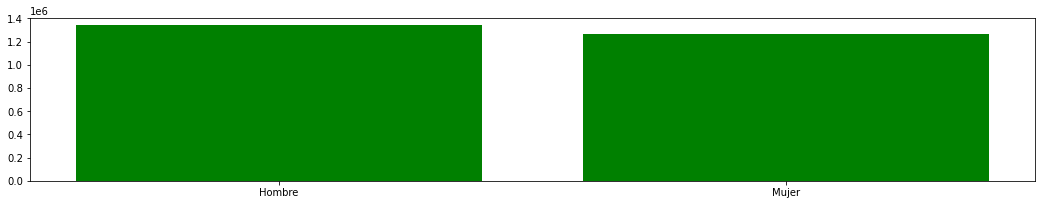

In [26]:
plt.figure(figsize = (18, 3))
# Gráfica de barras del número de hombres y mujeres
plt.bar(["Hombre", "Mujer"], [sum(df['SEXO'] == 1), sum(df['SEXO'] != 1)], color = "green")
plt.show()

In [27]:
# Grafica de barras de los positivos y no positivos

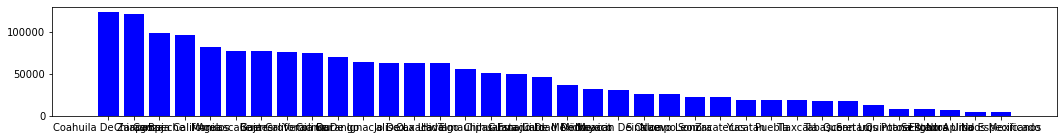

In [28]:
plt.figure(figsize = (18, 2))
# Gráfica de barras del número de positivos por estado
temp = df_2["Estado"].value_counts().to_dict()
estados = []
habitantes = []

for index, (key, value) in enumerate(temp.items()):
    estados.append(key)
    habitantes.append(value)
    


plt.bar(estados, habitantes, color = "blue")
plt.show()

<class 'dict'>


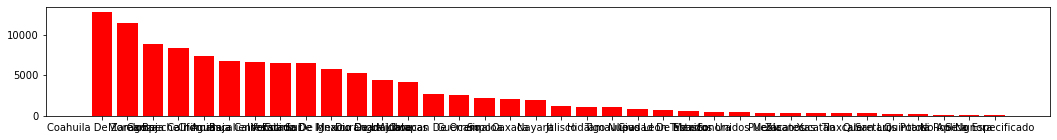

In [29]:
plt.figure(figsize = (18, 2))
# Gráfica de barras del número de fallecidos por estado

filtrado = df_2.loc[(df['FECHA_DEF']!= "9999-99-99")]


continentes = filtrado["Estado"].value_counts().to_dict()

print(type(continentes))
estados = []
habitantes = []

for index, (key, value) in enumerate(continentes.items()):
    estados.append(key)
    habitantes.append(value)
    


plt.bar(estados, habitantes, color = "red")
plt.show()

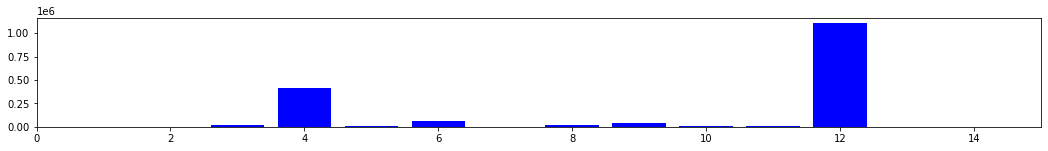

In [30]:
plt.figure(figsize = (18, 2))
# Gráfica de barras del número de positivos por la columna SECTOR
temp = df_2["SECTOR"].value_counts().to_dict()
estados = []
habitantes = []

for index, (key, value) in enumerate(temp.items()):
    estados.append(key)
    habitantes.append(value)

plt.bar(estados, habitantes, color = "blue")
plt.xlim(0, 15)
plt.show()

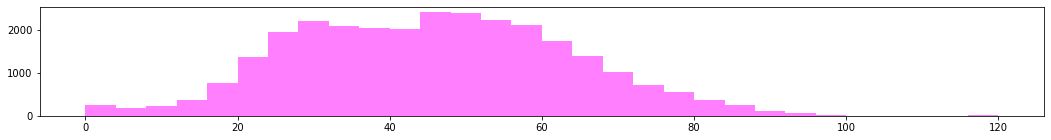

In [31]:
plt.figure(figsize = (18, 2))
# Histograma de la edad de los positivos

filtrado = df.loc[df['CLASIFICACION_FINAL'] == 1]
plt.hist(filtrado["EDAD"], bins = 30, color = "magenta", alpha = 0.5)
plt.show()

In [32]:
# Histograma de la edad de los no positivos

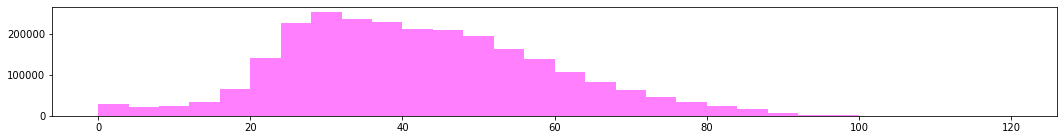

In [33]:
plt.figure(figsize = (18, 2))
# Histograma de la edad de los no positivos
filtrado = df.loc[df['CLASIFICACION_FINAL'] != 1]
plt.hist(filtrado["EDAD"], bins = 30, color = "magenta", alpha = 0.5)
plt.show()

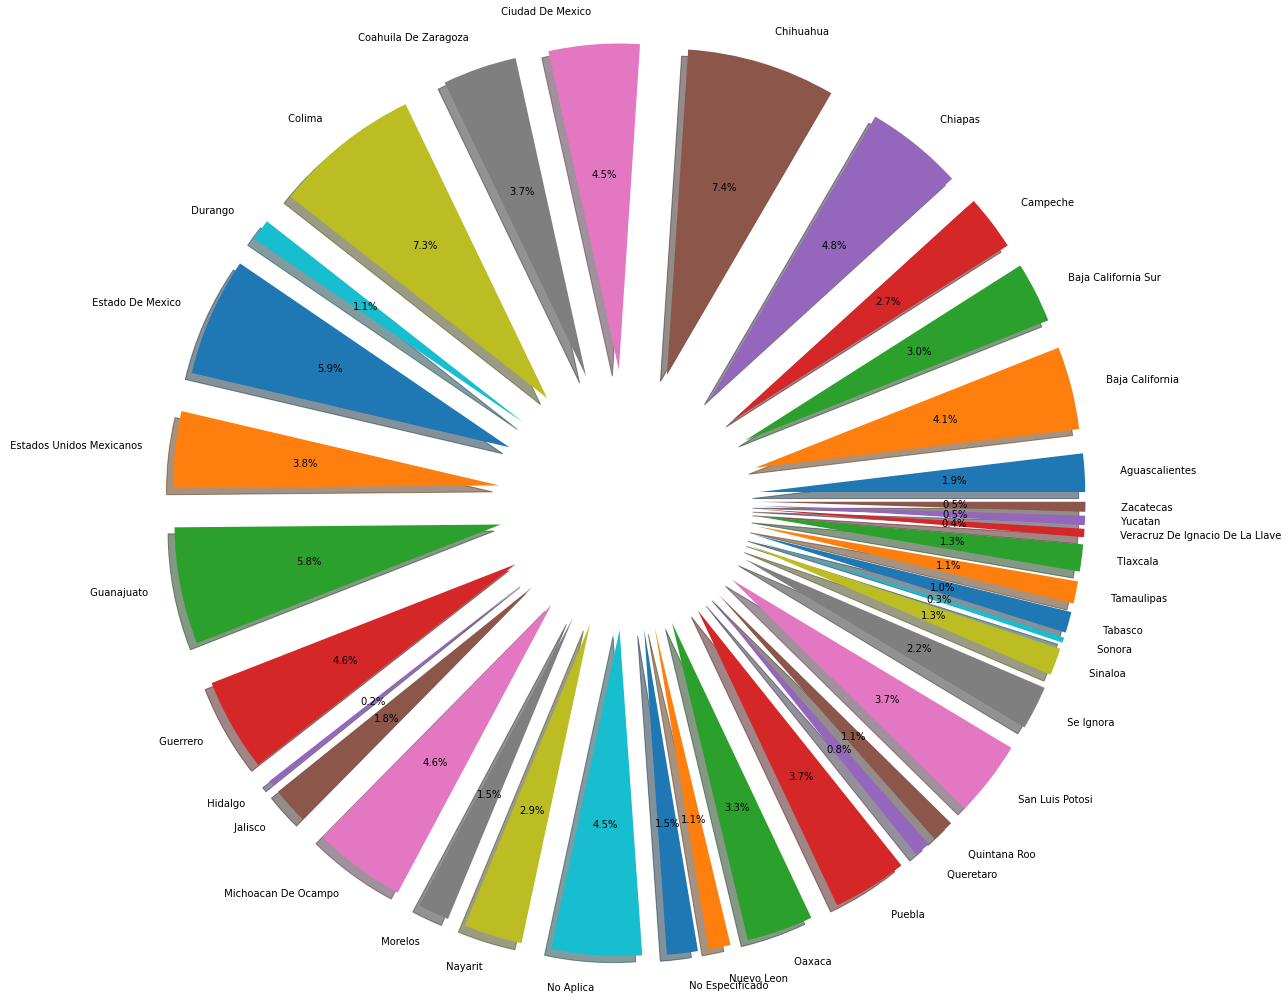

In [34]:
# Mayores de Edad 

fig, ax = plt.subplots(figsize = (15, 15))

labels = sorted([f" {x}" for x in df_2["Estado"].unique()])

ax.pie(x         = df_2[df_2["EDAD"] >= 18]["Estado"].value_counts(sort = False).values,
       labels    = labels,
       shadow    = True,
       explode   = [0.4 for i in range (len([f"Clase {x}" for x in df_2["Estado"].unique()]))],
       autopct   = "%1.1f%%",
       textprops = {"fontsize" : 10})  
plt.show()  

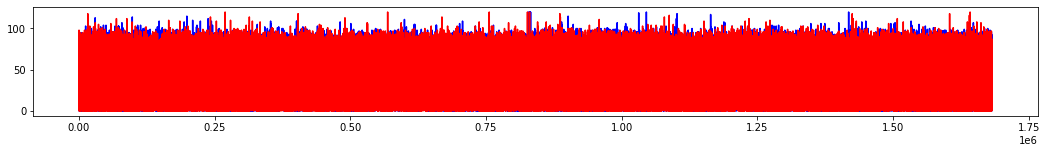

In [35]:
plt.figure(figsize = (18, 2))

plt.plot(df_2[df_2["SEXO"] == 1]["EDAD"], color = "blue")

plt.plot(df_2[df_2["SEXO"] == 2]["EDAD"], color = "red")

plt.show()

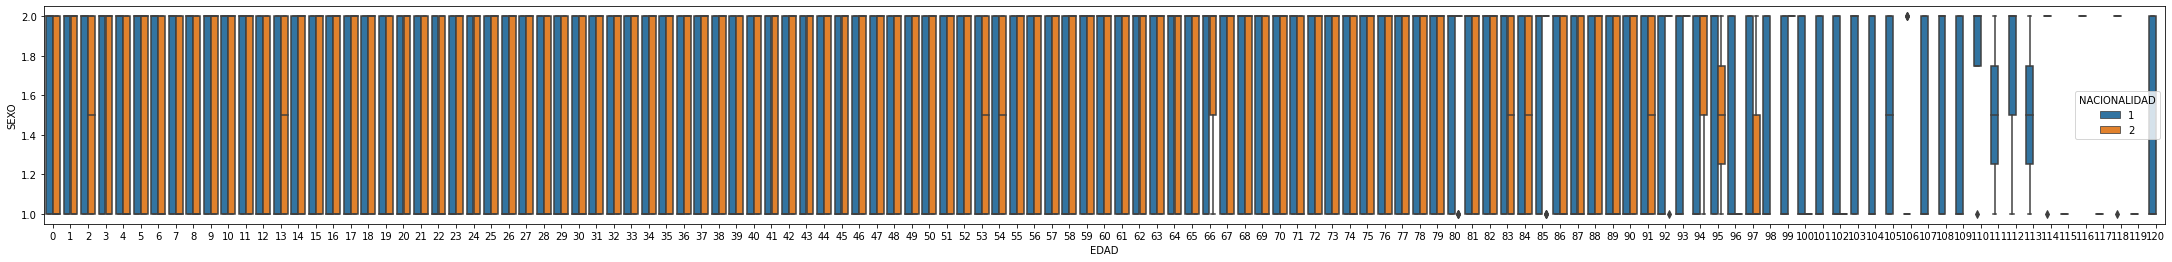

In [36]:

plt.figure(figsize = (38, 4))
sns.boxplot(x = df_2["EDAD"],
            y = df_2["SEXO"],
            hue = df_2["NACIONALIDAD"])

plt.show()

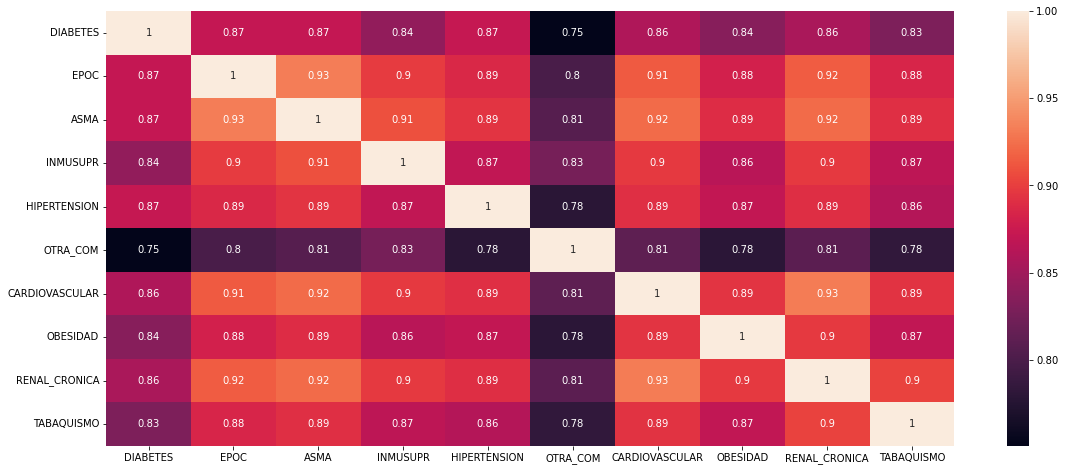

In [37]:
plt.figure(figsize = (19, 8))

sns.heatmap(data = df_2.iloc[:, 20:30].corr(), annot = True)

plt.show()

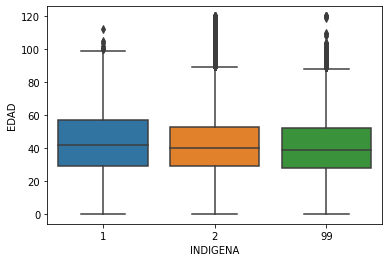

In [38]:
sns.boxplot(x = df["INDIGENA"],
            y = df["EDAD"])

plt.show()

#No se que significa los Valores de Indigena

1de68a


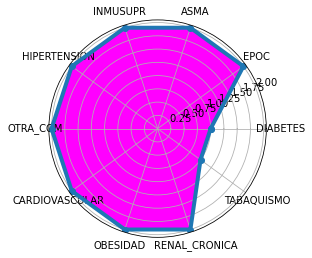

077d71


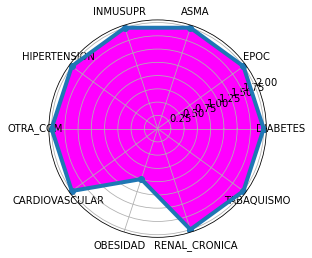

00a563


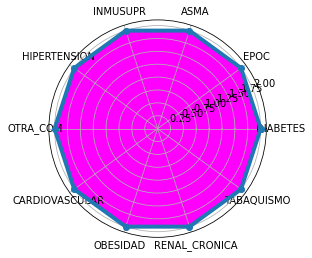

1b5dbf


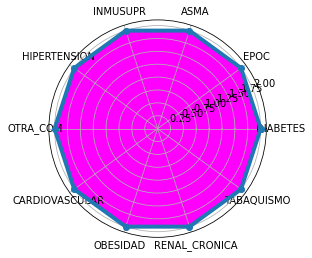

355233


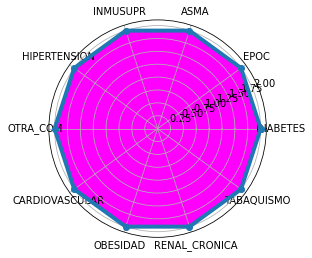

In [39]:
for i in [np.random.randint(0, df_2.shape[0]) for i in range(5)]:
    
    labels = df.columns[20:30]

    pattern = df.iloc[i, 20:30]

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)
    
    print(df.iloc[i, 1])

    # Esto es para añadir el último lado del polígono:
    pattern = np.concatenate((pattern, [pattern[0]]))
    angles = np.concatenate((angles, [angles[0]]))


    fig = plt.figure()
    ax = fig.add_subplot(polar = True)

    ax.plot(angles, pattern, "o-", linewidth = 4)           # Lineas en azul
    ax.fill(angles, pattern, alpha = 1, color = "magenta")   # Relleno magenta
    ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)      # Malla

    plt.show()

# Folium

In [40]:
# Hace falta un GeoJSON de los países, provincias, pueblos, etc.
# Y un DataFrame con la información a analizar: columna de datos y columna de nombre de países, provincias, pueblos, etc.
Datos_cancer = pd.read_csv("201114COVID19MEXICO.csv", encoding = "ISO-8859-1")
Datos_cancer

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,TOMA_MUESTRA,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-11-14,071735,2,9,21,2,21,21,114,1,...,2,2,2,1,1,3,99,MÃ©xico,97,97
1,2020-11-14,1468a5,1,4,5,1,15,5,18,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
2,2020-11-14,043f64,2,4,9,2,9,9,10,2,...,1,2,99,1,1,3,99,MÃ©xico,97,1
3,2020-11-14,0e07d8,1,4,15,2,15,15,104,2,...,2,2,99,1,1,3,99,MÃ©xico,97,2
4,2020-11-14,13757c,1,12,15,1,15,15,106,1,...,2,2,1,1,1,3,99,MÃ©xico,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2604654,2020-11-14,20edd4,2,4,30,1,30,30,44,1,...,2,2,2,1,4,6,99,MÃ©xico,97,97
2604655,2020-11-14,3b9335,1,4,6,1,6,6,2,1,...,2,2,2,2,97,6,99,MÃ©xico,97,97
2604656,2020-11-14,1ef034,2,10,9,1,13,15,58,2,...,2,2,2,2,97,1,99,MÃ©xico,97,2
2604657,2020-11-14,2e7cc4,2,12,15,1,15,15,63,1,...,2,2,1,2,97,6,99,MÃ©xico,97,97


In [41]:
Datos_cancer.replace(np.nan, 0, inplace = True)

In [42]:
Datos_cancer.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA', 'RESULTADO_LAB', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [43]:
# No tenemos las cordenadas
Datos_cancer_1 = pd.merge(left = Datos_cancer, right = df_1[['Estado','Clave Estado','Latitud','Longitud']], left_on = "MUNICIPIO_RES", right_on = "Clave Estado", how = "inner")


In [44]:
df_mapa = pd.DataFrame()
df_mapa["Estado"] = [string.title() for string in Datos_cancer_1["Estado"].value_counts().index]
fallecidos= Datos_cancer_1[Datos_cancer_1['FECHA_DEF']!= "9999-99-99"]

df_mapa["datos_mapa"] = fallecidos["Estado"].value_counts().to_list()



cancer_map = folium.Map(location = [23.634501, -102.552784], zoom_start = 10)



folium.Choropleth(geo_data     = "mexico.json",
                     data         = df_mapa,
                     columns      = ["Estado", "datos_mapa"],
                     key_on       = "feature.properties.name",
                     fill_color   = "Blues", 
                     fill_opacity = 0.7, 
                     line_opacity = 0.2,
                     legend_name  = "Embajadas y consultados en Madrid").add_to(cancer_map)


cancer_map

In [45]:
fallecidos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,RESULTADO_LAB,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI,Estado,Clave Estado,Latitud,Longitud
5,2020-11-14,12b431,1,4,5,2,15,5,18,2,...,1,3,99,MÃ©xico,97,2,Nayarit,18,21.8438765,-104.8714854
13,2020-11-14,0e42b6,1,6,25,2,25,25,18,1,...,1,3,99,MÃ©xico,97,97,Nayarit,18,21.8438765,-104.8714854
20,2020-11-14,1e40f5,1,12,5,2,5,5,18,2,...,1,3,99,MÃ©xico,97,1,Nayarit,18,21.8438765,-104.8714854
21,2020-11-14,0aa764,1,12,5,2,5,5,18,1,...,1,3,99,MÃ©xico,97,97,Nayarit,18,21.8438765,-104.8714854
23,2020-11-14,0155f4,1,6,25,2,25,25,18,2,...,1,3,99,MÃ©xico,97,2,Nayarit,18,21.8438765,-104.8714854


In [46]:
df_mapa = pd.DataFrame()
df_mapa["Estado"] = [string.title() for string in Datos_cancer_1["Estado"].value_counts().index]
df_mapa["datos_mapa"] = Datos_cancer_1["Estado"].value_counts().to_list()

cancer_map = folium.Map(location = [23.634501, -102.552784], zoom_start = 10)



folium.Choropleth(geo_data     = "mexico.json",
                     data         = df_mapa,
                     columns      = ["Estado", "datos_mapa"],
                     key_on       = "feature.properties.name",
                     fill_color   = "Blues", 
                     fill_opacity = 0.7, 
                     line_opacity = 0.2,
                     legend_name  = "Embajadas y consultados en Madrid").add_to(cancer_map)


cancer_map

In [47]:
# Vamos a arreglar el Nombre de la ciudad que esta en negro

import json

with open("mexico.json", "br") as file:
    madrid_json = json.load(file)
    
nombres = []

for i in range(len(madrid_json["features"])):
    nombres.append(madrid_json["features"][i]["properties"]["name"])
    
nombres

# dataframe con la informacion del json

df_Estados = pd.DataFrame(nombres, columns = ["Estado"])

df_Estados = df_Estados.sort_values("Estado").reset_index(drop = True)

df_Estados.head(3)

,Estado
0,Aguascalientes
1,Baja California
2,Baja California Sur


In [48]:
# Tomo la columna BARRIO Y la copio y la tranformo a minuscula

df_Estados_2 = pd.DataFrame(Datos_cancer_1["Estado"].unique(), columns = ["Estado_1"])

df_Estados_2 = df_Estados_2.sort_values("Estado_1").reset_index(drop = True)

df_Estados_2["Estado_1"] = df_Estados_2["Estado_1"].apply(lambda x : x.title())

df_Estados_2["Estado_2"] = df_Estados_2["Estado_1"].apply(lambda x : x.upper())

df_Estados_2.head(3)



,Estado_1,Estado_2
0,Aguascalientes,AGUASCALIENTES
1,Baja California,BAJA CALIFORNIA
2,Baja California Sur,BAJA CALIFORNIA SUR


In [49]:
#pd.merge(df_barrios, df_barrios_2, on = "barrios", how = "outer")
df_Estados_3 = pd.merge(df_Estados, df_Estados_2, left_on = "Estado", right_on = "Estado_1", how = "inner")

df_Estados_3.head(3)

,Estado,Estado_1,Estado_2
0,Aguascalientes,Aguascalientes,AGUASCALIENTES
1,Baja California,Baja California,BAJA CALIFORNIA
2,Baja California Sur,Baja California Sur,BAJA CALIFORNIA SUR


In [50]:
set(df_Estados_2["Estado_1"]).difference(set(df_Estados_3["Estado"]))

{'Ciudad De Mexico',
 'Estados Unidos Mexicanos',
 'No Aplica',
 'No Especificado',
 'Se Ignora'}

In [53]:
Datos_cancer_1 = pd.merge(df_Estados_2,Datos_cancer_1, left_on = "Estado_2", right_on = "Estado")